# Dialogue -> New Metrics
***Normalized Engagement Score, $NES(i)$***

- We define the **Normalized Engagement Score** $NES(i)$ for each $i$-th user ($i \in \{1,2,3,4\}$) in a group as:

$$
NES(i) = w_{\text{M}} \left( \frac{M(i)}{M_{\text{total}}} \right) + w_{\text{C}} \left( \frac{C(i)}{C_{\text{total}}} \right)
$$

- Where:
    - $M(i)$ is the **Message Count** of the $i$-th user (total number of messages sent by user $i$.
    - $C(i)$ is the **Total Characters** typed by the $i$-th user (sum of characters in all messages sent by user  $$$i$).
    - $M_{\text{total}} = \sum_{i=1}^{4} M_i$ is the total message count of all users in the group.
    - $C_{\text{total}} = \sum_{i=1}^{4} C_i$ is the total character count of all users in the group.
    - $M_{\text{Norm}}(i) = \left( \frac{M(i)}{M_{\text{total}}} \right)$, $C_{\text{Norm}} = \left( \frac{C(i)}{C_{\text{total}}} \right)$
    - $w_{\text{MC}}$ and $w_{\text{TC}}$ are the weights assigned to message count and total characters, respectively, with $w_{\text{M}} + w_{\text{C}} = 1$.

In [8]:
# import os
# import re
# import pandas as pd
# from glob import glob

# # Define the path to the directory containing the CSV files
# data_path = '../data/dialogue/'  # Replace with your actual path

# # Pattern to match the filenames
# file_pattern = os.path.join(data_path, '*_messages.csv')

# # Initialize an empty list to store DataFrames
# df_list = []

# # List of system senders to exclude
# system_senders = ['DEVIL', 'SUMMARY_LOG', 'soohwan', 'AI_DUP_LOG', 'DM_REMOVAL_LOG']

# # Iterate over all matching files, sorted by filename
# for file_path in sorted(glob(file_pattern)):
#     # Extract groupNum, condition, and task from the filename
#     filename = os.path.basename(file_path)
#     match = re.match(r'g(\d+)_(\w)(\d)_messages\.csv', filename)
#     if match:
#         groupNum_str, condition, task = match.groups()
#         groupNum_int = int(groupNum_str)
#         groupNum = f'g{groupNum_int}'
#     else:
#         continue  # Skip files that do not match the pattern

#     # Read the CSV file with proper encoding
#     try:
#         df = pd.read_csv(file_path, encoding='utf-8-sig')
#     except UnicodeDecodeError:
#         df = pd.read_csv(file_path, encoding='utf-8')

#     # Ensure the required columns are present
#     if 'sender' not in df.columns or 'content' not in df.columns:
#         continue  # Skip files that do not have the required columns

#     # Exclude messages from system senders
#     df = df[~df['sender'].isin(system_senders)]

#     # If after exclusion there are no participants, skip this file
#     if df.empty:
#         continue

#     # Group by 'sender' and calculate M(i) and C(i)
#     df['C(i)'] = df['content'].astype(str).str.len()
#     metrics = df.groupby('sender', as_index=False).agg(
#         M=('content', 'count'),
#         C=('C(i)', 'sum')
#     )

#     # Calculate M_total and C_total
#     M_total = metrics['M'].sum()
#     C_total = metrics['C'].sum()

#     # Calculate M_norm and C_norm
#     metrics['M_norm'] = metrics['M'] / M_total
#     metrics['C_norm'] = metrics['C'] / C_total

#     # Calculate NES with different weight combinations
#     weight_combinations = [
#         (0.6, 0.4),
#         (0.5, 0.5),
#         (0.4, 0.6)
#     ]

#     for w_m, w_c in weight_combinations:
#         nes_label = f'NES(w_m={w_m}, w_c={w_c})'
#         metrics[nes_label] = w_m * metrics['M_norm'] + w_c * metrics['C_norm']

#     # Add groupNum, condition, task, M_total, and C_total columns
#     metrics['groupNum'] = groupNum_int  # Use integer for sorting
#     metrics['condition'] = condition
#     metrics['task'] = task
#     metrics['M_total'] = M_total
#     metrics['C_total'] = C_total

#     # Reorder columns
#     metrics = metrics[[
#         'sender', 'groupNum', 'condition', 'task',
#         'M', 'C', 'M_total', 'C_total', 'M_norm', 'C_norm',
#         'NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)'
#     ]]

#     # Append to the list
#     df_list.append(metrics)

# # Concatenate all DataFrames
# if df_list:
#     result_df = pd.concat(df_list, ignore_index=True)
# else:
#     result_df = pd.DataFrame(columns=[
#         'sender', 'groupNum', 'condition', 'task',
#         'M', 'C', 'M_total', 'C_total', 'M_norm', 'C_norm',
#         'NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)'
#     ])

# # Sort the result DataFrame by groupNum (as integer) and then by task
# result_df.sort_values(by=['groupNum', 'task'], inplace=True, ignore_index=True)

# # Convert 'groupNum' back to string with 'g' prefix for display
# result_df['groupNum'] = result_df['groupNum'].apply(lambda x: f'g{x}')

# # Save the result to a CSV file
# output_path = '../data/dialogue_calculated/engagement_scores.csv'  # Replace with your desired output path
# result_df.to_csv(output_path, index=False, encoding='utf-8-sig')

# print(f"Results have been saved to {output_path}")

Results have been saved to ../data/dialogue_calculated/engagement_scores.csv


In [5]:
# No change devil to junior

import os
import re
import pandas as pd
from glob import glob

# Define the path to the directory containing the CSV files
data_path = '../data/dialogue_C_DEVIL/'  # Replace with your actual path

# Pattern to match the filenames
file_pattern = os.path.join(data_path, '*_messages.csv')

# Initialize an empty list to store DataFrames
df_list = []

# List of system senders to exclude
system_senders = ['DEVIL', 'SUMMARY_LOG', 'soohwan', 'AI_DUP_LOG', 'DM_REMOVAL_LOG']

# Regular expression pattern to match Korean characters, numbers, and spaces
char_pattern = re.compile(r'[가-힣\u1100-\u11FF\u3130-\u318F0-9 ]')

# Iterate over all matching files, sorted by filename
for file_path in sorted(glob(file_pattern)):
    # Extract groupNum, condition, and task from the filename
    filename = os.path.basename(file_path)
    match = re.match(r'g(\d+)_(\w)(\d)_messages\.csv', filename)
    if match:
        groupNum_str, condition, task = match.groups()
        groupNum_int = int(groupNum_str)
        groupNum = f'g{groupNum_int}'
    else:
        continue  # Skip files that do not match the pattern

    # Read the CSV file with proper encoding
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='utf-8')

    # Ensure the required columns are present
    if 'sender' not in df.columns or 'content' not in df.columns:
        continue  # Skip files that do not have the required columns

    # Exclude messages from system senders
    df = df[~df['sender'].isin(system_senders)]

    # If after exclusion there are no participants, skip this file
    if df.empty:
        continue

    # Calculate C(i) by counting only Korean characters, numbers, and spaces
    def count_korean_chars(text):
        return len(char_pattern.findall(str(text)))

    df['C(i)'] = df['content'].apply(count_korean_chars)

    # Group by 'sender' and calculate M(i) and C(i)
    metrics = df.groupby('sender', as_index=False).agg(
        M=('content', 'count'),
        C=('C(i)', 'sum')
    )

    # If C_total is zero (no valid characters), skip this group
    if metrics['C'].sum() == 0:
        print(f"Warning: Group {groupNum} in file {filename} has zero valid characters after filtering.")
        continue

    # Calculate M_total and C_total
    M_total = metrics['M'].sum()
    C_total = metrics['C'].sum()

    # Calculate M_norm and C_norm
    metrics['M_norm'] = metrics['M'] / M_total
    metrics['C_norm'] = metrics['C'] / C_total

    # Calculate NES with different weight combinations
    weight_combinations = [
        (0.6, 0.4),
        (0.5, 0.5),
        (0.4, 0.6)
    ]

    for w_m, w_c in weight_combinations:
        nes_label = f'NES(w_m={w_m}, w_c={w_c})'
        metrics[nes_label] = w_m * metrics['M_norm'] + w_c * metrics['C_norm']

    # Add groupNum, condition, task, M_total, and C_total columns
    metrics['groupNum'] = groupNum_int  # Use integer for sorting
    metrics['condition'] = condition
    metrics['task'] = task
    metrics['M_total'] = M_total
    metrics['C_total'] = C_total

    # Define function to determine role based on sender
    def get_role(sender):
        match = re.search(r'p(\d+)', sender)
        if match:
            number = int(match.group(1))
            if number % 4 == 0:
                return 'Junior'
            else:
                return 'Senior'
        else:
            return 'Other'

    # Apply the function to create the 'role' column
    metrics['role'] = metrics['sender'].apply(get_role)

    # Reorder columns to include 'role' next to 'sender'
    metrics = metrics[[
        'sender', 'role', 'groupNum', 'condition', 'task',
        'M', 'C', 'M_total', 'C_total', 'M_norm', 'C_norm',
        'NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)'
    ]]

    # Append to the list
    df_list.append(metrics)

# Concatenate all DataFrames
if df_list:
    result_df = pd.concat(df_list, ignore_index=True)
else:
    result_df = pd.DataFrame(columns=[
        'sender', 'role', 'groupNum', 'condition', 'task',
        'M', 'C', 'M_total', 'C_total', 'M_norm', 'C_norm',
        'NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)'
    ])

# Sort the result DataFrame by groupNum (as integer) and then by task
result_df.sort_values(by=['groupNum', 'task'], inplace=True, ignore_index=True)

# Convert 'groupNum' back to string with 'g' prefix for display
result_df['groupNum'] = result_df['groupNum'].apply(lambda x: f'g{x}')

# Save the result to a CSV file
output_path = '../data/dialogue_calculatedMetric/engagement_scores_DEVIL.csv'  # Replace with your desired output path
result_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"Results have been saved to {output_path}")

Results have been saved to ../data/dialogue_calculatedMetric/engagement_scores_DEVIL.csv


In [46]:
# change devil to junior

import os
import re
import pandas as pd
from glob import glob

# Define the path to the directory containing the CSV files
data_path = '../data/dialogue_C_changeToJunior/'  # Replace with your actual path

# Pattern to match the filenames
file_pattern = os.path.join(data_path, '*_messages.csv')

# Initialize an empty list to store DataFrames
df_list = []

# List of system senders to exclude
system_senders = ['DEVIL', 'SUMMARY_LOG', 'soohwan', 'AI_DUP_LOG', 'DM_REMOVAL_LOG']

# Regular expression pattern to match Korean characters, numbers, and spaces
char_pattern = re.compile(r'[가-힣\u1100-\u11FF\u3130-\u318F0-9 ]')

# Iterate over all matching files, sorted by filename
for file_path in sorted(glob(file_pattern)):
    # Extract groupNum, condition, and task from the filename
    filename = os.path.basename(file_path)
    match = re.match(r'g(\d+)_(\w)(\d)_messages\.csv', filename)
    if match:
        groupNum_str, condition, task = match.groups()
        groupNum_int = int(groupNum_str)
        groupNum = f'g{groupNum_int}'
    else:
        continue  # Skip files that do not match the pattern

    # Read the CSV file with proper encoding
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='utf-8')

    # Ensure the required columns are present
    if 'sender' not in df.columns or 'content' not in df.columns:
        continue  # Skip files that do not have the required columns

    # Exclude messages from system senders
    df = df[~df['sender'].isin(system_senders)]

    # If after exclusion there are no participants, skip this file
    if df.empty:
        continue

    # Calculate C(i) by counting only Korean characters, numbers, and spaces
    def count_korean_chars(text):
        return len(char_pattern.findall(str(text)))

    df['C(i)'] = df['content'].apply(count_korean_chars)

    # Group by 'sender' and calculate M(i) and C(i)
    metrics = df.groupby('sender', as_index=False).agg(
        M=('content', 'count'),
        C=('C(i)', 'sum')
    )

    # If C_total is zero (no valid characters), skip this group
    if metrics['C'].sum() == 0:
        print(f"Warning: Group {groupNum} in file {filename} has zero valid characters after filtering.")
        continue

    # Calculate M_total and C_total
    M_total = metrics['M'].sum()
    C_total = metrics['C'].sum()

    # Calculate M_norm and C_norm
    metrics['M_norm'] = metrics['M'] / M_total
    metrics['C_norm'] = metrics['C'] / C_total

    # Calculate NES with different weight combinations
    weight_combinations = [
        (0.6, 0.4),
        (0.5, 0.5),
        (0.4, 0.6)
    ]

    for w_m, w_c in weight_combinations:
        nes_label = f'NES(w_m={w_m}, w_c={w_c})'
        metrics[nes_label] = w_m * metrics['M_norm'] + w_c * metrics['C_norm']

    # Add groupNum, condition, task, M_total, and C_total columns
    metrics['groupNum'] = groupNum_int  # Use integer for sorting
    metrics['condition'] = condition
    metrics['task'] = task
    metrics['M_total'] = M_total
    metrics['C_total'] = C_total

    # Define function to determine role based on sender
    def get_role(sender):
        match = re.search(r'p(\d+)', sender)
        if match:
            number = int(match.group(1))
            if number % 4 == 0:
                return 'Junior'
            else:
                return 'Senior'
        else:
            return 'Other'

    # Apply the function to create the 'role' column
    metrics['role'] = metrics['sender'].apply(get_role)

    # Reorder columns to include 'role' next to 'sender'
    metrics = metrics[[
        'sender', 'role', 'groupNum', 'condition', 'task',
        'M', 'C', 'M_total', 'C_total', 'M_norm', 'C_norm',
        'NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)'
    ]]

    # Append to the list
    df_list.append(metrics)

# Concatenate all DataFrames
if df_list:
    result_df = pd.concat(df_list, ignore_index=True)
else:
    result_df = pd.DataFrame(columns=[
        'sender', 'role', 'groupNum', 'condition', 'task',
        'M', 'C', 'M_total', 'C_total', 'M_norm', 'C_norm',
        'NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)'
    ])

# Sort the result DataFrame by groupNum (as integer) and then by task
result_df.sort_values(by=['groupNum', 'task'], inplace=True, ignore_index=True)

# Convert 'groupNum' back to string with 'g' prefix for display
result_df['groupNum'] = result_df['groupNum'].apply(lambda x: f'g{x}')

# Save the result to a CSV file
output_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'  # Replace with your desired output path
result_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"Results have been saved to {output_path}")

Results have been saved to ../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv


# Visualization of Calculated Metrics (Normalized Engagement Score - 한 세션당 proportion)

/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/823656169.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


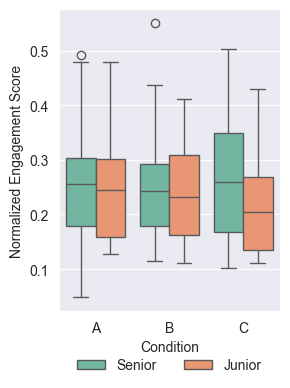

Plot for NES(w_m=0.6, w_c=0.4) saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_NES(w_m=0.6, w_c=0.4)_condition_role.png


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/823656169.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


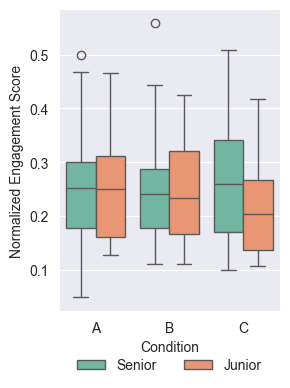

/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/823656169.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


Plot for NES(w_m=0.5, w_c=0.5) saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_NES(w_m=0.5, w_c=0.5)_condition_role.png


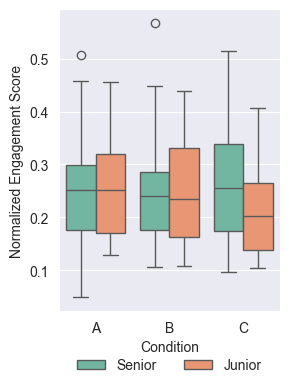

Plot for NES(w_m=0.4, w_c=0.6) saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_NES(w_m=0.4, w_c=0.6)_condition_role.png


In [15]:
# No change devil to junior
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (replace 'path_to_your_csv.csv' with your actual file path)
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)


# List of columns to plot (PAA1 and PAA4)
columns_to_plot = ['NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)']

# Set the style to have a grey grid
sns.set_style('darkgrid')

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(3, 4))
    sns.boxplot(
        data=data[['condition', 'role', col]],
        x='condition',
        y=col,
        hue='role',
        palette=sns.color_palette('Set2')  # Use Seaborn's Set2 palette for a pleasing color scheme
    )

    # Customize the plot
    # plt.title(f'Boxplot of {col} Scores by Condition and Role', fontsize=14)
    plt.xlabel('Condition', fontsize=10)
    plt.ylabel('Normalized Engagement Score', fontsize=10)

    # Adjust the legend to a single row at the bottom
    plt.legend(
        # title='Role',
        fontsize=10,
        title_fontsize=12,
        loc='center', 
        bbox_to_anchor=(0.5, -0.18),  # Position the legend below the plot
        ncol=2,  # Arrange legend items in a single row
        frameon=False  # Optional: Remove the box around the legend
    )

    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}_condition_role.png'  # Save each plot with a unique filename
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

    print(f"Plot for {col} saved to: {output_path}")

/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2082825843.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


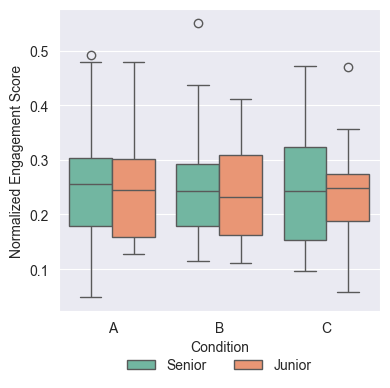

/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2082825843.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


Plot for NES_m6 saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_NES_m6_changeToJunior.pdf


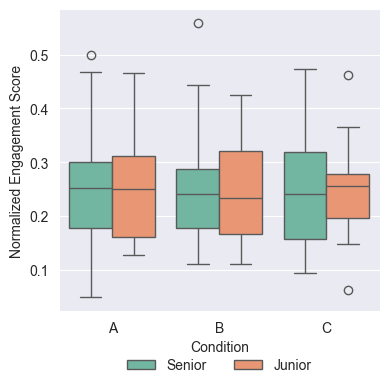

Plot for NES_m5 saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_NES_m5_changeToJunior.pdf


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2082825843.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


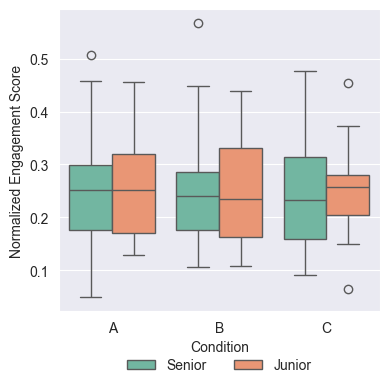

Plot for NES_m4 saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_NES_m4_changeToJunior.pdf


In [21]:
# change devil to junior
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (replace 'path_to_your_csv.csv' with your actual file path)
file_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)


# List of columns to plot (PAA1 and PAA4)
columns_to_plot = ['NES_m6', 'NES_m5', 'NES_m4']

# Set the style to have a grey grid
sns.set_style('darkgrid')

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(4, 4))
    sns.boxplot(
        data=data[['condition', 'role', col]],
        x='condition',
        y=col,
        hue='role',
        palette=sns.color_palette('Set2')  # Use Seaborn's Set2 palette for a pleasing color scheme
    )

    # Customize the plot
    # plt.title(f'Boxplot of {col} Scores by Condition and Role', fontsize=14)
    plt.xlabel('Condition', fontsize=10)
    plt.ylabel('Normalized Engagement Score', fontsize=10)

    # Adjust the legend to a single row at the bottom
    plt.legend(
        # title='Role',
        fontsize=10,
        title_fontsize=12,
        loc='center', 
        bbox_to_anchor=(0.5, -0.18),  # Position the legend below the plot
        ncol=2,  # Arrange legend items in a single row
        frameon=False  # Optional: Remove the box around the legend
    )

    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}_changeToJunior.pdf'  # Save each plot with a unique filename
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

    print(f"Plot for {col} saved to: {output_path}")

# Data Summary

In [49]:
# No change devil to junior
import pandas as pd
import numpy as np
from io import StringIO
import os

def create_stat_matrix_df(df, measure):
    """
    Creates a statistical matrix as a DataFrame for a given measure
    Returns a pandas DataFrame with the formatted matrix including overall statistics
    """
    # Create empty DataFrame with desired structure
    matrix_df = pd.DataFrame(
        index=['Senior', 'Junior', 'All'],
        columns=pd.MultiIndex.from_product([['Condition A', 'Condition B', 'Condition C', 'All'], ['Mean', 'SD']])
    )
    
    # Calculate statistics for each cell
    for role in ['Senior', 'Junior']:
        for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
            group = df[(df['role'] == role) & (df['condition'] == condition)]
            matrix_df.loc[role, (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
            matrix_df.loc[role, (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate row totals (by role)
    for role in ['Senior', 'Junior']:
        group = df[df['role'] == role]
        matrix_df.loc[role, ('All', 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc[role, ('All', 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate column totals (by condition)
    for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
        group = df[df['condition'] == condition]
        matrix_df.loc['All', (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc['All', (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate and add overall statistics at the intersection
    all_data = df[measure].dropna()
    matrix_df.loc['All', ('All', 'Mean')] = f"{all_data.mean():.2f}"
    matrix_df.loc['All', ('All', 'SD')] = f"{all_data.std():.2f}"
    
    return matrix_df

def save_all_measure_matrices(input_csv_path, output_dir):
    """
    Creates and saves matrices for all measures
    """
    # Read the CSV
    df = pd.read_csv(input_csv_path)
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each measure
    measures = ['NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)']
    
    for measure in measures:
        # Create matrix DataFrame
        matrix_df = create_stat_matrix_df(df, measure)
        
        # Save to CSV
        output_path = os.path.join(output_dir, f'{measure}_matrix.csv')
        matrix_df.to_csv(output_path)
        print(f"Saved {measure} matrix to {output_path}")
        
        # Also print to console
        print(f"\n=== Matrix for {measure} ===")
        print(matrix_df.to_string())
        print("\n")

# Usage example:
if __name__ == "__main__":
    input_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'
    output_dir = '../dataSummary/dialogueCalculated/'
    save_all_measure_matrices(input_path, output_dir)

Saved NES(w_m=0.6, w_c=0.4) matrix to ../dataSummary/dialogueCalculated/NES(w_m=0.6, w_c=0.4)_matrix.csv

=== Matrix for NES(w_m=0.6, w_c=0.4) ===
       Condition A       Condition B       Condition C         All      
              Mean    SD        Mean    SD        Mean    SD  Mean    SD
Senior        0.25  0.10        0.25  0.10        0.26  0.11  0.25  0.10
Junior        0.26  0.11        0.24  0.10        0.21  0.10  0.24  0.10
All           0.25  0.10        0.25  0.10        0.25  0.11  0.25  0.10


Saved NES(w_m=0.5, w_c=0.5) matrix to ../dataSummary/dialogueCalculated/NES(w_m=0.5, w_c=0.5)_matrix.csv

=== Matrix for NES(w_m=0.5, w_c=0.5) ===
       Condition A       Condition B       Condition C         All      
              Mean    SD        Mean    SD        Mean    SD  Mean    SD
Senior        0.25  0.10        0.25  0.10        0.26  0.11  0.25  0.10
Junior        0.26  0.11        0.24  0.10        0.21  0.09  0.24  0.10
All           0.25  0.10        0.25  0.10     

In [50]:
# change devil to junior
import pandas as pd
import numpy as np
from io import StringIO
import os

def create_stat_matrix_df(df, measure):
    """
    Creates a statistical matrix as a DataFrame for a given measure
    Returns a pandas DataFrame with the formatted matrix including overall statistics
    """
    # Create empty DataFrame with desired structure
    matrix_df = pd.DataFrame(
        index=['Senior', 'Junior', 'All'],
        columns=pd.MultiIndex.from_product([['Condition A', 'Condition B', 'Condition C', 'All'], ['Mean', 'SD']])
    )
    
    # Calculate statistics for each cell
    for role in ['Senior', 'Junior']:
        for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
            group = df[(df['role'] == role) & (df['condition'] == condition)]
            matrix_df.loc[role, (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
            matrix_df.loc[role, (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate row totals (by role)
    for role in ['Senior', 'Junior']:
        group = df[df['role'] == role]
        matrix_df.loc[role, ('All', 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc[role, ('All', 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate column totals (by condition)
    for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
        group = df[df['condition'] == condition]
        matrix_df.loc['All', (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc['All', (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate and add overall statistics at the intersection
    all_data = df[measure].dropna()
    matrix_df.loc['All', ('All', 'Mean')] = f"{all_data.mean():.2f}"
    matrix_df.loc['All', ('All', 'SD')] = f"{all_data.std():.2f}"
    
    return matrix_df

def save_all_measure_matrices(input_csv_path, output_dir):
    """
    Creates and saves matrices for all measures
    """
    # Read the CSV
    df = pd.read_csv(input_csv_path)
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each measure
    measures = ['NES(w_m=0.6, w_c=0.4)', 'NES(w_m=0.5, w_c=0.5)', 'NES(w_m=0.4, w_c=0.6)']
    
    for measure in measures:
        # Create matrix DataFrame
        matrix_df = create_stat_matrix_df(df, measure)
        
        # Save to CSV
        output_path = os.path.join(output_dir, f'{measure}_matrix_changeJunior.csv')
        matrix_df.to_csv(output_path)
        print(f"Saved {measure} matrix to {output_path}")
        
        # Also print to console
        print(f"\n=== Matrix for {measure} ===")
        print(matrix_df.to_string())
        print("\n")

# Usage example:
if __name__ == "__main__":
    input_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'
    output_dir = '../dataSummary/dialogueCalculated/'
    save_all_measure_matrices(input_path, output_dir)

Saved NES(w_m=0.6, w_c=0.4) matrix to ../dataSummary/dialogueCalculated/NES(w_m=0.6, w_c=0.4)_matrix_changeJunior.csv

=== Matrix for NES(w_m=0.6, w_c=0.4) ===
       Condition A       Condition B       Condition C         All      
              Mean    SD        Mean    SD        Mean    SD  Mean    SD
Senior        0.25  0.10        0.25  0.10        0.24  0.10  0.25  0.10
Junior        0.26  0.11        0.24  0.10        0.25  0.10  0.25  0.10
All           0.25  0.10        0.25  0.10        0.24  0.10  0.25  0.10


Saved NES(w_m=0.5, w_c=0.5) matrix to ../dataSummary/dialogueCalculated/NES(w_m=0.5, w_c=0.5)_matrix_changeJunior.csv

=== Matrix for NES(w_m=0.5, w_c=0.5) ===
       Condition A       Condition B       Condition C         All      
              Mean    SD        Mean    SD        Mean    SD  Mean    SD
Senior        0.25  0.10        0.25  0.10        0.24  0.10  0.25  0.10
Junior        0.26  0.11        0.24  0.10        0.25  0.10  0.25  0.10
All           0.25  0

# Data Visualization of M(message), C(character)

<>:31: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:34: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:31: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:34: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2025980457.py:31: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if col is 'M':
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2025980457.py:34: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif col is 'C':
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2025980457.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


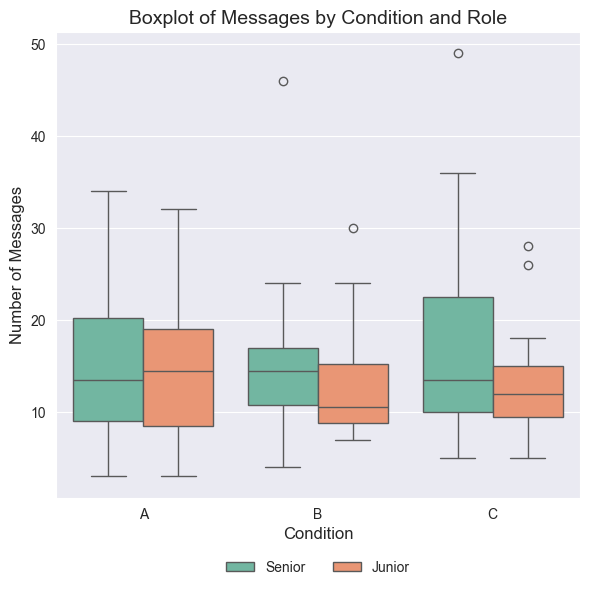

/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/2025980457.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


Plot for M saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_M.png


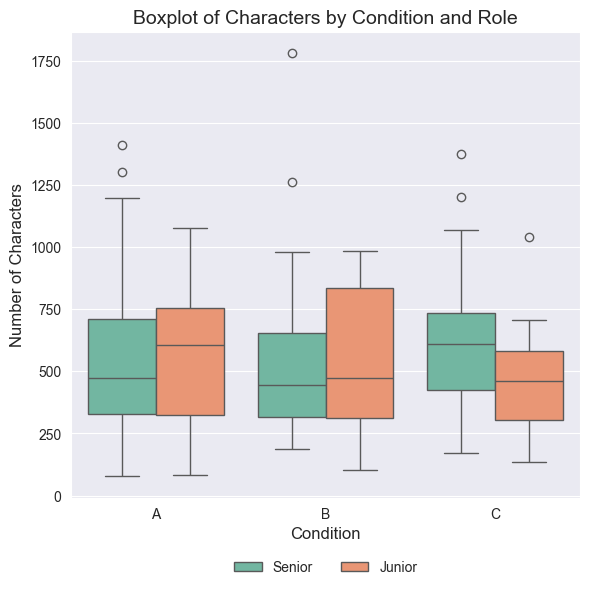

Plot for C saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_C.png


In [12]:
# No change devil to junior
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (replace 'path_to_your_csv.csv' with your actual file path)
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)


# List of columns to plot (PAA1 and PAA4)
columns_to_plot = ['M', 'C']

# Set the style to have a grey grid
sns.set_style('darkgrid')

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(6, 6))
    sns.boxplot(
        data=data[['condition', 'role', col]],
        x='condition',
        y=col,
        hue='role',
        palette=sns.color_palette('Set2')  # Use Seaborn's Set2 palette for a pleasing color scheme
    )

    # Customize the plot
    plt.xlabel('Condition', fontsize=12)
    if col == 'M':
        plt.title(f'Boxplot of Messages by Condition and Role', fontsize=14)
        plt.ylabel(f'Number of Messages', fontsize=12)
    elif col == 'C':
        plt.title(f'Boxplot of Characters by Condition and Role', fontsize=14)
        plt.ylabel(f'Number of Characters', fontsize=12)

    # Adjust the legend to a single row at the bottom
    plt.legend(
        # title='Role',
        fontsize=10,
        title_fontsize=12,
        loc='center', 
        bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
        ncol=2,  # Arrange legend items in a single row
        frameon=False  # Optional: Remove the box around the legend
    )

    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}.png'  # Save each plot with a unique filename
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

    print(f"Plot for {col} saved to: {output_path}")

/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/899295229.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


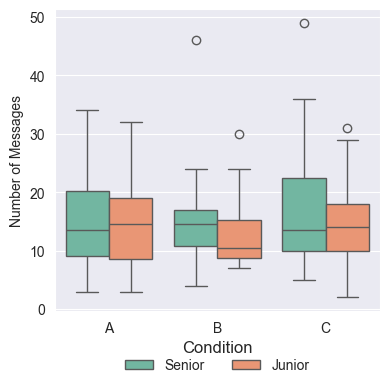

Plot for M saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_M_changeToJunior.pdf


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_21782/899295229.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


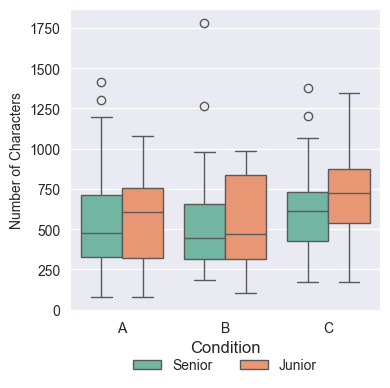

Plot for C saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_C_changeToJunior.pdf


In [22]:
# change devil to junior
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (replace 'path_to_your_csv.csv' with your actual file path)
file_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)


# List of columns to plot (PAA1 and PAA4)
columns_to_plot = ['M','C']

# Set the style to have a grey grid
sns.set_style('darkgrid')

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(4, 4))
    sns.boxplot(
        data=data[['condition', 'role', col]],
        x='condition',
        y=col,
        hue='role',
        palette=sns.color_palette('Set2')  # Use Seaborn's Set2 palette for a pleasing color scheme
    )

    # Customize the plot
    plt.xlabel('Condition', fontsize=12)
    if col == 'M':
        # plt.title(f'Boxplot of Messages by Condition and Role', fontsize=14)
        plt.ylabel('Number of Messages', fontsize=10)
    elif col == 'C':
        # plt.title(f'Boxplot of Characters by Condition and Role', fontsize=14)
        plt.ylabel('Number of Characters', fontsize=10)

    # Adjust the legend to a single row at the bottom
    plt.legend(
        # title='Role',
        fontsize=10,
        title_fontsize=12,
        loc='center', 
        bbox_to_anchor=(0.5, -0.18),  # Position the legend below the plot
        ncol=2,  # Arrange legend items in a single row
        frameon=False  # Optional: Remove the box around the legend
    )

    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}_changeToJunior.pdf'  # Save each plot with a unique filename
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

    print(f"Plot for {col} saved to: {output_path}")

# Data Summary for Messages(M) & Characters(C)

In [8]:
# No change devil to junior
import pandas as pd
import numpy as np
from io import StringIO
import os

def create_stat_matrix_df(df, measure):
    """
    Creates a statistical matrix as a DataFrame for a given measure
    Returns a pandas DataFrame with the formatted matrix including overall statistics
    """
    # Create empty DataFrame with desired structure
    matrix_df = pd.DataFrame(
        index=['Senior', 'Junior', 'All'],
        columns=pd.MultiIndex.from_product([['Condition A', 'Condition B', 'Condition C', 'All'], ['Mean', 'SD']])
    )
    
    # Calculate statistics for each cell
    for role in ['Senior', 'Junior']:
        for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
            group = df[(df['role'] == role) & (df['condition'] == condition)]
            matrix_df.loc[role, (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
            matrix_df.loc[role, (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate row totals (by role)
    for role in ['Senior', 'Junior']:
        group = df[df['role'] == role]
        matrix_df.loc[role, ('All', 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc[role, ('All', 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate column totals (by condition)
    for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
        group = df[df['condition'] == condition]
        matrix_df.loc['All', (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc['All', (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate and add overall statistics at the intersection
    all_data = df[measure].dropna()
    matrix_df.loc['All', ('All', 'Mean')] = f"{all_data.mean():.2f}"
    matrix_df.loc['All', ('All', 'SD')] = f"{all_data.std():.2f}"
    
    return matrix_df

def save_all_measure_matrices(input_csv_path, output_dir):
    """
    Creates and saves matrices for all measures
    """
    # Read the CSV
    df = pd.read_csv(input_csv_path)
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each measure
    measures = ['M', 'C']
    
    for measure in measures:
        # Create matrix DataFrame
        matrix_df = create_stat_matrix_df(df, measure)
        
        # Save to CSV
        output_path = os.path.join(output_dir, f'{measure}_matrix.csv')
        matrix_df.to_csv(output_path)
        print(f"Saved {measure} matrix to {output_path}")
        
        # Also print to console
        print(f"\n=== Matrix for {measure} ===")
        print(matrix_df.to_string())
        print("\n")

# Usage example:
if __name__ == "__main__":
    input_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'
    output_dir = '../dataSummary/dialogueCalculated/'
    save_all_measure_matrices(input_path, output_dir)

Saved M matrix to ../dataSummary/dialogueCalculated/M_matrix.csv

=== Matrix for M ===
       Condition A       Condition B       Condition C          All      
              Mean    SD        Mean    SD        Mean    SD   Mean    SD
Senior       14.93  7.89       14.83  7.04       16.75  9.73  15.36  8.18
Junior       15.00  8.03       13.50  7.13       13.58  7.12  14.27  7.47
All          14.95  7.89       14.50  7.01       15.96  9.18  15.09  8.00


Saved C matrix to ../dataSummary/dialogueCalculated/C_matrix.csv

=== Matrix for C ===
       Condition A         Condition B         Condition C             All        
              Mean      SD        Mean      SD        Mean      SD    Mean      SD
Senior      537.01  306.50      529.81  320.02      611.14  279.25  553.74  303.16
Junior      577.62  279.56      535.42  301.04      485.00  239.88  543.92  272.78
All         547.17  299.07      531.21  312.22      579.60  273.10  551.29  295.19




In [9]:
# change devil to junior
import pandas as pd
import numpy as np
from io import StringIO
import os

def create_stat_matrix_df(df, measure):
    """
    Creates a statistical matrix as a DataFrame for a given measure
    Returns a pandas DataFrame with the formatted matrix including overall statistics
    """
    # Create empty DataFrame with desired structure
    matrix_df = pd.DataFrame(
        index=['Senior', 'Junior', 'All'],
        columns=pd.MultiIndex.from_product([['Condition A', 'Condition B', 'Condition C', 'All'], ['Mean', 'SD']])
    )
    
    # Calculate statistics for each cell
    for role in ['Senior', 'Junior']:
        for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
            group = df[(df['role'] == role) & (df['condition'] == condition)]
            matrix_df.loc[role, (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
            matrix_df.loc[role, (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate row totals (by role)
    for role in ['Senior', 'Junior']:
        group = df[df['role'] == role]
        matrix_df.loc[role, ('All', 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc[role, ('All', 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate column totals (by condition)
    for condition, col_name in zip(['A', 'B', 'C'], ['Condition A', 'Condition B', 'Condition C']):
        group = df[df['condition'] == condition]
        matrix_df.loc['All', (col_name, 'Mean')] = f"{group[measure].mean():.2f}"
        matrix_df.loc['All', (col_name, 'SD')] = f"{group[measure].std():.2f}"
    
    # Calculate and add overall statistics at the intersection
    all_data = df[measure].dropna()
    matrix_df.loc['All', ('All', 'Mean')] = f"{all_data.mean():.2f}"
    matrix_df.loc['All', ('All', 'SD')] = f"{all_data.std():.2f}"
    
    return matrix_df

def save_all_measure_matrices(input_csv_path, output_dir):
    """
    Creates and saves matrices for all measures
    """
    # Read the CSV
    df = pd.read_csv(input_csv_path)
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each measure
    measures = ['M','C']
    
    for measure in measures:
        # Create matrix DataFrame
        matrix_df = create_stat_matrix_df(df, measure)
        
        # Save to CSV
        output_path = os.path.join(output_dir, f'{measure}_matrix_changeJunior.csv')
        matrix_df.to_csv(output_path)
        print(f"Saved {measure} matrix to {output_path}")
        
        # Also print to console
        print(f"\n=== Matrix for {measure} ===")
        print(matrix_df.to_string())
        print("\n")

# Usage example:
if __name__ == "__main__":
    input_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'
    output_dir = '../dataSummary/dialogueCalculated/'
    save_all_measure_matrices(input_path, output_dir)

Saved M matrix to ../dataSummary/dialogueCalculated/M_matrix_changeJunior.csv

=== Matrix for M ===
       Condition A       Condition B       Condition C          All      
              Mean    SD        Mean    SD        Mean    SD   Mean    SD
Senior       14.93  7.89       14.83  7.04       16.75  9.73  15.36  8.18
Junior       15.00  8.03       13.50  7.13       15.15  8.26  14.67  7.75
All          14.95  7.89       14.50  7.01       16.33  9.30  15.19  8.06


Saved C matrix to ../dataSummary/dialogueCalculated/C_matrix_changeJunior.csv

=== Matrix for C ===
       Condition A         Condition B         Condition C             All        
              Mean      SD        Mean      SD        Mean      SD    Mean      SD
Senior      537.01  306.50      529.81  320.02      611.14  279.25  553.74  303.16
Junior      577.62  279.56      535.42  301.04      708.62  319.58  602.04  297.04
All         547.17  299.07      531.21  312.22      637.00  290.32  566.01  301.59




# Data Visualization for M_total(message), C_total(character)

Number of unique groups per condition:
condition
A    24
B    12
C    12
Name: groupNum, dtype: int64


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/3760335639.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/3760335639.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(


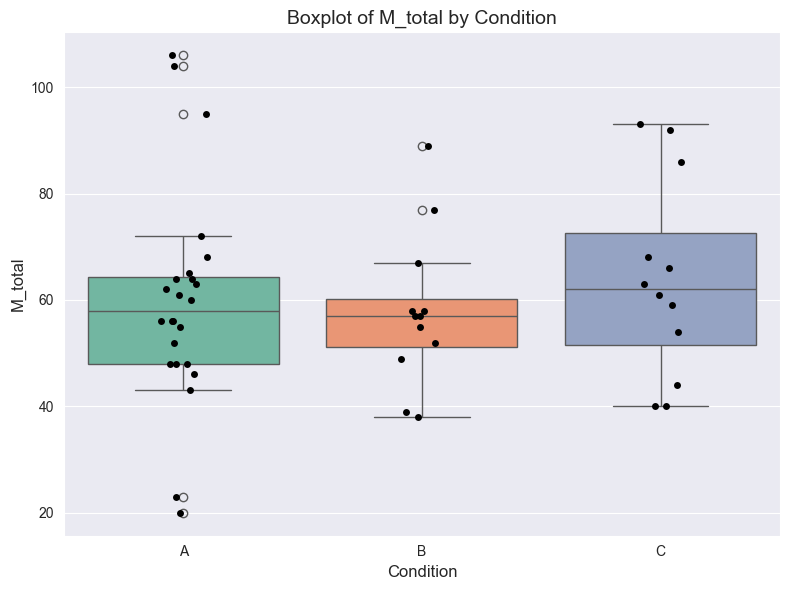

Plot for M_total saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_M_total.png


In [63]:
# No change devil to junior / M_total
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Ensure this path is correct
data = pd.read_csv(file_path)

# Extract M_total per group, condition, and task
data_subset = data[['groupNum', 'condition', 'task', 'M_total']].drop_duplicates()

# Verify the number of groups per condition
group_counts = data_subset.groupby('condition')['groupNum'].nunique()
print("Number of unique groups per condition:")
print(group_counts)

# Set the style to have a grey grid
sns.set_style('darkgrid')

# List of columns to plot
columns_to_plot = ['M_total']

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Create the boxplot
    sns.boxplot(
        data=data_subset,
        x='condition',
        y=col,
        palette=sns.color_palette('Set2')
    )
    
    # Add data points
    sns.stripplot(
        data=data_subset,
        x='condition',
        y=col,
        color='black',
        size=5,
        jitter=True  # Add jitter to avoid overlapping points
    )
    
    # Customize the plot
    plt.title(f'Boxplot of {col} by Condition', fontsize=14)
    plt.xlabel('Condition', fontsize=12)
    plt.ylabel(f'{col}', fontsize=12)
    
    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    print(f"Plot for {col} saved to: {output_path}")

Number of unique groups per condition:
condition
A    24
B    12
C    12
Name: groupNum, dtype: int64


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/284536142.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/284536142.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(


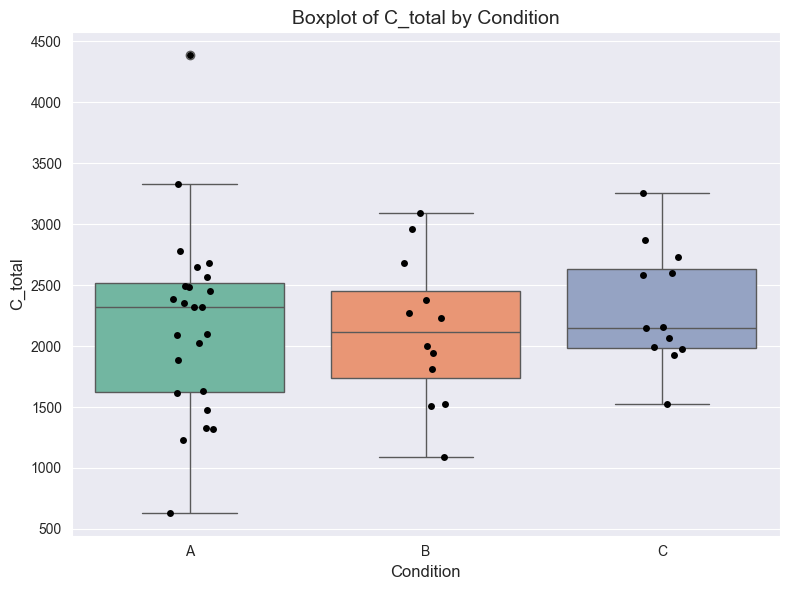

Plot for C_total saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_C_total.png


In [64]:
# No change devil to junior / C_total
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Ensure this path is correct
data = pd.read_csv(file_path)

# Extract M_total per group, condition, and task
data_subset = data[['groupNum', 'condition', 'task', 'C_total']].drop_duplicates()

# Verify the number of groups per condition
group_counts = data_subset.groupby('condition')['groupNum'].nunique()
print("Number of unique groups per condition:")
print(group_counts)

# Set the style to have a grey grid
sns.set_style('darkgrid')

# List of columns to plot
columns_to_plot = ['C_total']

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Create the boxplot
    sns.boxplot(
        data=data_subset,
        x='condition',
        y=col,
        palette=sns.color_palette('Set2')
    )
    
    # Add data points
    sns.stripplot(
        data=data_subset,
        x='condition',
        y=col,
        color='black',
        size=5,
        jitter=True  # Add jitter to avoid overlapping points
    )
    
    # Customize the plot
    plt.title(f'Boxplot of {col} by Condition', fontsize=14)
    plt.xlabel('Condition', fontsize=12)
    plt.ylabel(f'{col}', fontsize=12)
    
    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    print(f"Plot for {col} saved to: {output_path}")

Number of unique groups per condition:
condition
A    24
B    12
C    12
Name: groupNum, dtype: int64


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/2051195548.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/2051195548.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(


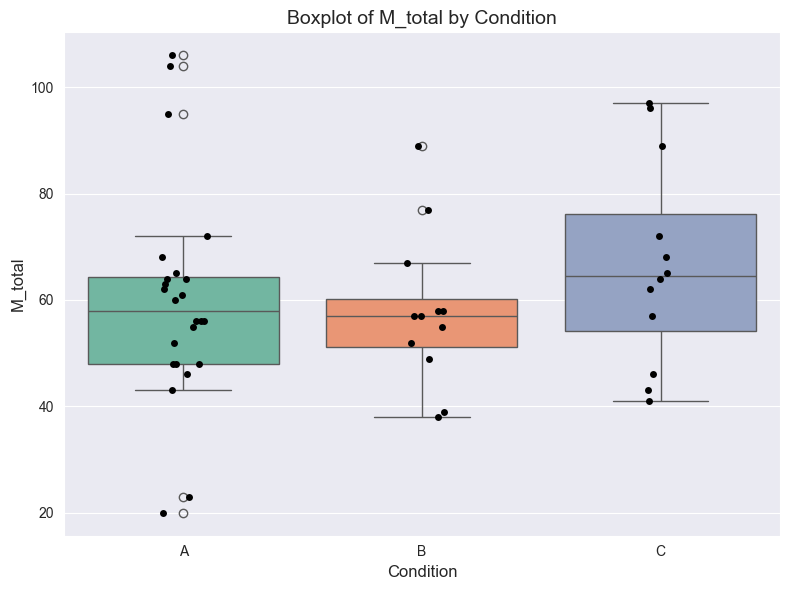

Plot for M_total saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_M_total_changeJunior.png


In [65]:
# change devil to junior / M_total
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'  # Ensure this path is correct
data = pd.read_csv(file_path)

# Extract M_total per group, condition, and task
data_subset = data[['groupNum', 'condition', 'task', 'M_total']].drop_duplicates()

# Verify the number of groups per condition
group_counts = data_subset.groupby('condition')['groupNum'].nunique()
print("Number of unique groups per condition:")
print(group_counts)

# Set the style to have a grey grid
sns.set_style('darkgrid')

# List of columns to plot
columns_to_plot = ['M_total']

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Create the boxplot
    sns.boxplot(
        data=data_subset,
        x='condition',
        y=col,
        palette=sns.color_palette('Set2')
    )
    
    # Add data points
    sns.stripplot(
        data=data_subset,
        x='condition',
        y=col,
        color='black',
        size=5,
        jitter=True  # Add jitter to avoid overlapping points
    )
    
    # Customize the plot
    plt.title(f'Boxplot of {col} by Condition', fontsize=14)
    plt.xlabel('Condition', fontsize=12)
    plt.ylabel(f'{col}', fontsize=12)
    
    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}_changeJunior.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    print(f"Plot for {col} saved to: {output_path}")

Number of unique groups per condition:
condition
A    24
B    12
C    12
Name: groupNum, dtype: int64


/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/1547610181.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/82/_gc4rmpn48n89bsp8xt7psd80000gn/T/ipykernel_12354/1547610181.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(


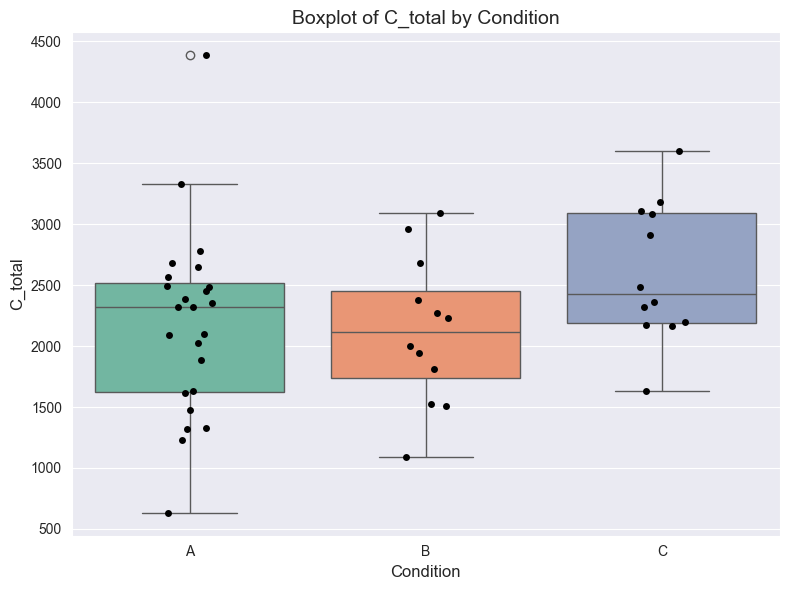

Plot for C_total saved to: ../dataVisualization/dialogueCalculatedMetric/boxplot_C_total_changeJunior.png


In [66]:
# change devil to junior / C_total
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'  # Ensure this path is correct
data = pd.read_csv(file_path)

# Extract C_total per group, condition, and task
data_subset = data[['groupNum', 'condition', 'task', 'C_total']].drop_duplicates()

# Verify the number of groups per condition
group_counts = data_subset.groupby('condition')['groupNum'].nunique()
print("Number of unique groups per condition:")
print(group_counts)

# Set the style to have a grey grid
sns.set_style('darkgrid')

# List of columns to plot
columns_to_plot = ['C_total']

# Loop through the columns and create a boxplot for each
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Create the boxplot
    sns.boxplot(
        data=data_subset,
        x='condition',
        y=col,
        palette=sns.color_palette('Set2')
    )
    
    # Add data points
    sns.stripplot(
        data=data_subset,
        x='condition',
        y=col,
        color='black',
        size=5,
        jitter=True  # Add jitter to avoid overlapping points
    )
    
    # Customize the plot
    plt.title(f'Boxplot of {col} by Condition', fontsize=14)
    plt.xlabel('Condition', fontsize=12)
    plt.ylabel(f'{col}', fontsize=12)
    
    # Save the plot to a file
    output_path = f'../dataVisualization/dialogueCalculatedMetric/boxplot_{col}_changeJunior.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    print(f"Plot for {col} saved to: {output_path}")

# Data Summary for M_total, C_total

In [55]:
# No change devil to junior / M_total

import pandas as pd

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract M_total per group, condition, and task, and remove duplicates to get unique group-task entries
data_subset = data[['groupNum', 'condition', 'task', 'M_total']].drop_duplicates()

# Ensure M_total is numeric (in case of any non-numeric entries)
data_subset['M_total'] = pd.to_numeric(data_subset['M_total'], errors='coerce')

# Compute mean and standard deviation of M_total for each condition
stats = data_subset.groupby('condition')['M_total'].agg(['mean', 'std']).reset_index()

# Print the results
print("***** No change Devil to Junior *****")
print("Mean and standard deviation of M_total for each condition:")
print(stats)

# Optionally, format the output for better readability
print("\nFormatted Output:")
for index, row in stats.iterrows():
    condition = row['condition']
    mean = row['mean']
    std_dev = row['std']
    print(f"Condition {condition}: Mean M_total = {mean:.2f}, Standard Deviation = {std_dev:.2f}")

***** No change Devil to Junior *****
Mean and standard deviation of M_total for each condition:
  condition       mean        std
0         A  59.791667  20.406689
1         B  58.000000  14.434806
2         C  63.833333  18.624682

Formatted Output:
Condition A: Mean M_total = 59.79, Standard Deviation = 20.41
Condition B: Mean M_total = 58.00, Standard Deviation = 14.43
Condition C: Mean M_total = 63.83, Standard Deviation = 18.62


In [56]:
# No change devil to junior / C_total

import pandas as pd

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract C_total per group, condition, and task, and remove duplicates to get unique group-task entries
data_subset = data[['groupNum', 'condition', 'task', 'C_total']].drop_duplicates()

# Ensure C_total is numeric (in case of any non-numeric entries)
data_subset['C_total'] = pd.to_numeric(data_subset['C_total'], errors='coerce')

# Compute mean and standard deviation of C_total for each condition
stats = data_subset.groupby('condition')['C_total'].agg(['mean', 'std']).reset_index()

# Print the results
print("***** No change Devil to Junior *****")
print("Mean and standard deviation of C_total for each condition:")
print(stats)

# Optionally, format the output for better readability
print("\nFormatted Output:")
for index, row in stats.iterrows():
    condition = row['condition']
    mean = row['mean']
    std_dev = row['std']
    print(f"Condition {condition}: Mean C_total = {mean:.2f}, Standard Deviation = {std_dev:.2f}")

***** No change Devil to Junior *****
Mean and standard deviation of C_total for each condition:
  condition         mean         std
0         A  2188.666667  767.489281
1         B  2124.833333  602.737819
2         C  2318.416667  489.736006

Formatted Output:
Condition A: Mean C_total = 2188.67, Standard Deviation = 767.49
Condition B: Mean C_total = 2124.83, Standard Deviation = 602.74
Condition C: Mean C_total = 2318.42, Standard Deviation = 489.74


In [39]:
# change devil to junior / M_total

import pandas as pd

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores_changeJunior.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract M_total per group, condition, and task, and remove duplicates to get unique group-task entries
data_subset = data[['groupNum', 'condition', 'task', 'M_total']].drop_duplicates()

# Ensure M_total is numeric (in case of any non-numeric entries)
data_subset['M_total'] = pd.to_numeric(data_subset['M_total'], errors='coerce')

# Compute mean and standard deviation of M_total for each condition
stats = data_subset.groupby('condition')['M_total'].agg(['mean', 'std']).reset_index()

# Print the results
print("***** Change Devil to Junior *****")
print("Mean and standard deviation of M_total for each condition:")
print(stats)

# Optionally, format the output for better readability
print("\nFormatted Output:")
for index, row in stats.iterrows():
    condition = row['condition']
    mean = row['mean']
    std_dev = row['std']
    print(f"Condition {condition}: Mean M_total = {mean:.2f}, Standard Deviation = {std_dev:.2f}")

***** Change Devil to Junior *****
Mean and standard deviation of M_total for each condition:
  condition       mean        std
0         A  59.791667  20.406689
1         B  58.000000  14.434806
2         C  66.666667  19.260574

Formatted Output:
Condition A: Mean M_total = 59.79, Standard Deviation = 20.41
Condition B: Mean M_total = 58.00, Standard Deviation = 14.43
Condition C: Mean M_total = 66.67, Standard Deviation = 19.26


In [58]:
# Change devil to junior / C_total

import pandas as pd

# Load the dataset
file_path = '../data/dialogue_calculatedMetric/engagement_scores.csv'  # Update this to the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract C_total per group, condition, and task, and remove duplicates to get unique group-task entries
data_subset = data[['groupNum', 'condition', 'task', 'C_total']].drop_duplicates()

# Ensure C_total is numeric (in case of any non-numeric entries)
data_subset['C_total'] = pd.to_numeric(data_subset['C_total'], errors='coerce')

# Compute mean and standard deviation of C_total for each condition
stats = data_subset.groupby('condition')['C_total'].agg(['mean', 'std']).reset_index()

# Print the results
print("***** Change Devil to Junior *****")
print("Mean and standard deviation of C_total for each condition:")
print(stats)

# Optionally, format the output for better readability
print("\nFormatted Output:")
for index, row in stats.iterrows():
    condition = row['condition']
    mean = row['mean']
    std_dev = row['std']
    print(f"Condition {condition}: Mean C_total = {mean:.2f}, Standard Deviation = {std_dev:.2f}")

***** Change Devil to Junior *****
Mean and standard deviation of C_total for each condition:
  condition         mean         std
0         A  2188.666667  767.489281
1         B  2124.833333  602.737819
2         C  2318.416667  489.736006

Formatted Output:
Condition A: Mean C_total = 2188.67, Standard Deviation = 767.49
Condition B: Mean C_total = 2124.83, Standard Deviation = 602.74
Condition C: Mean C_total = 2318.42, Standard Deviation = 489.74
